# Import Statements


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

colors_df = pd.read_csv("data/colors.csv")

# Data Exploration


**How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours.**


In [3]:
colors_df

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [4]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [5]:
colors_df.tail()

,id,name,rgb,is_trans
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f
134,9999,[No Color],05131D,f


**Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.**


In [6]:
grouped_colors = colors_df.groupby("is_trans")
grouped_colors.count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [7]:
grouped_colors["is_trans"].value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

<h3> Understanding LEGO Themes vs. LEGO Sets </h3>


Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png"> </img>


A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png"> </img>


The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.


In [8]:
sets_df = pd.read_csv("data/sets.csv")
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [9]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [10]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**In which year were the first LEGO sets released and what were these sets called?**:


In [11]:
sets_by_year = sets_df.sort_values("year")
sets_name_n_year = sets_by_year.loc[0, ["name", "year"]]
sets_name_n_year

name    Gears
year     1965
Name: 0, dtype: object

**How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started**:


In [12]:
sets_by_year.head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts.


In [13]:
lego_set_with_most_parts = sets_df.sort_values("num_parts", ascending=False).head()
lego_set_with_most_parts

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year.**:


In [14]:
lego_released = sets_df.groupby("year").count()
lego_released

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


**How do the number of sets released in 1955 compare to the number of sets released in 2019?**


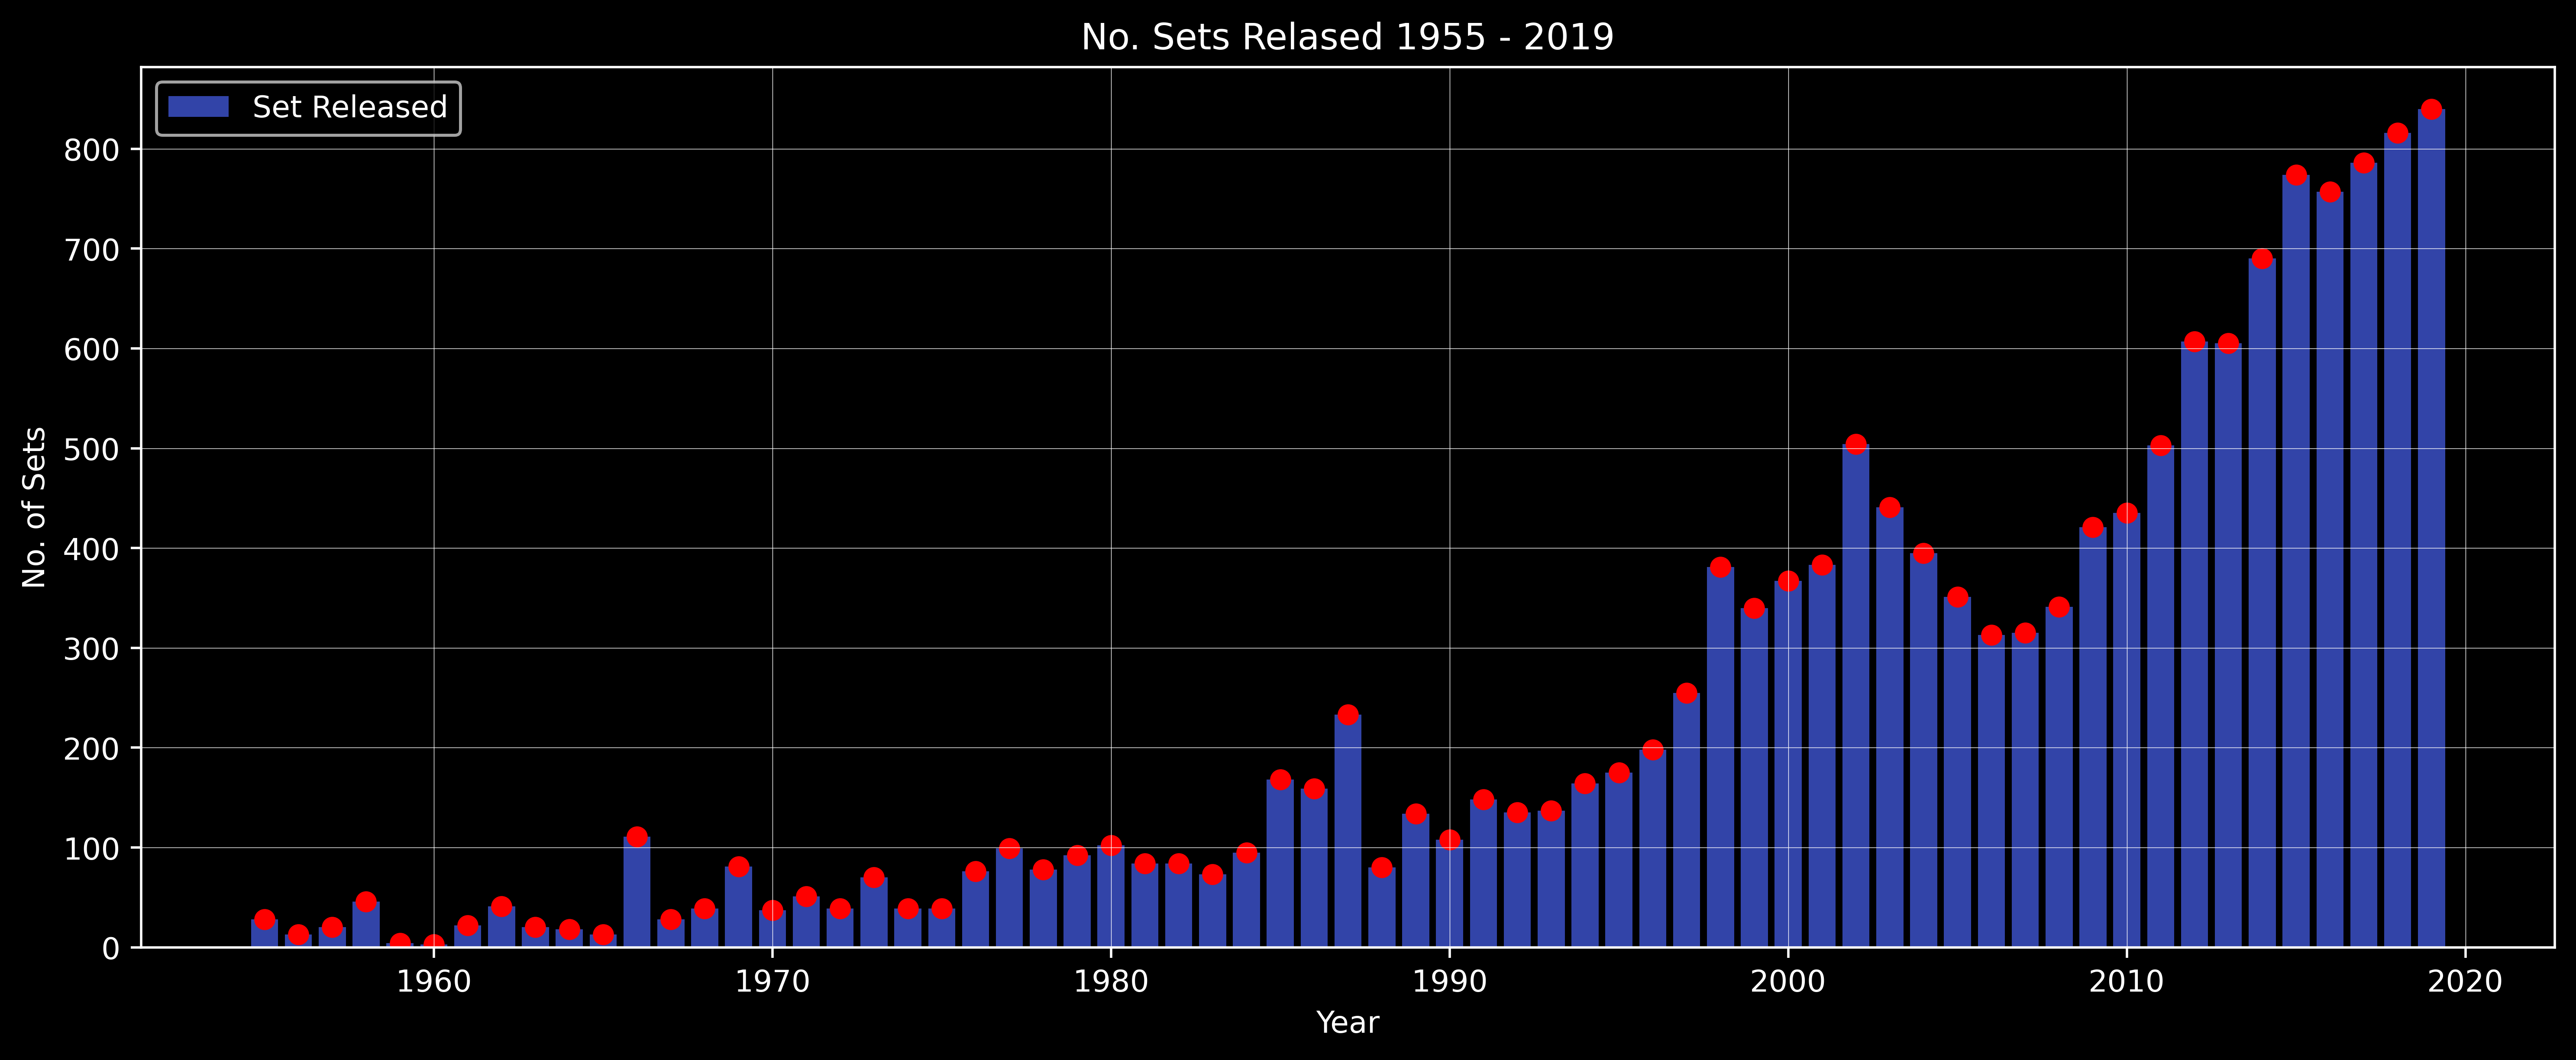

In [15]:
x_cor = lego_released[4:-2].index
y_cor = lego_released[4:-2].set_num

plot_title = "No. Sets Relased 1955 - 2019"
plot_x_label = "Year"
plot_y_label = "No. of Sets"


plt.figure(figsize=(12, 5), dpi=500)
plt.title(plot_title)
plt.xlabel(plot_x_label)
plt.ylabel(plot_y_label)

plt.bar(x_cor, y_cor, label="Set Released", color="#3244a8")
plt.scatter(x_cor, y_cor, color="r")

plt.grid(visible=True, which="both", linewidth="0.2")
plt.legend()
plt.tight_layout()
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.


In [16]:
unique_themes_df = sets_df.groupby("year").agg({"theme_id": pd.Series.nunique})
unique_themes_df

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


In [17]:
unique_themes_df.tail()

,theme_id
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).**:


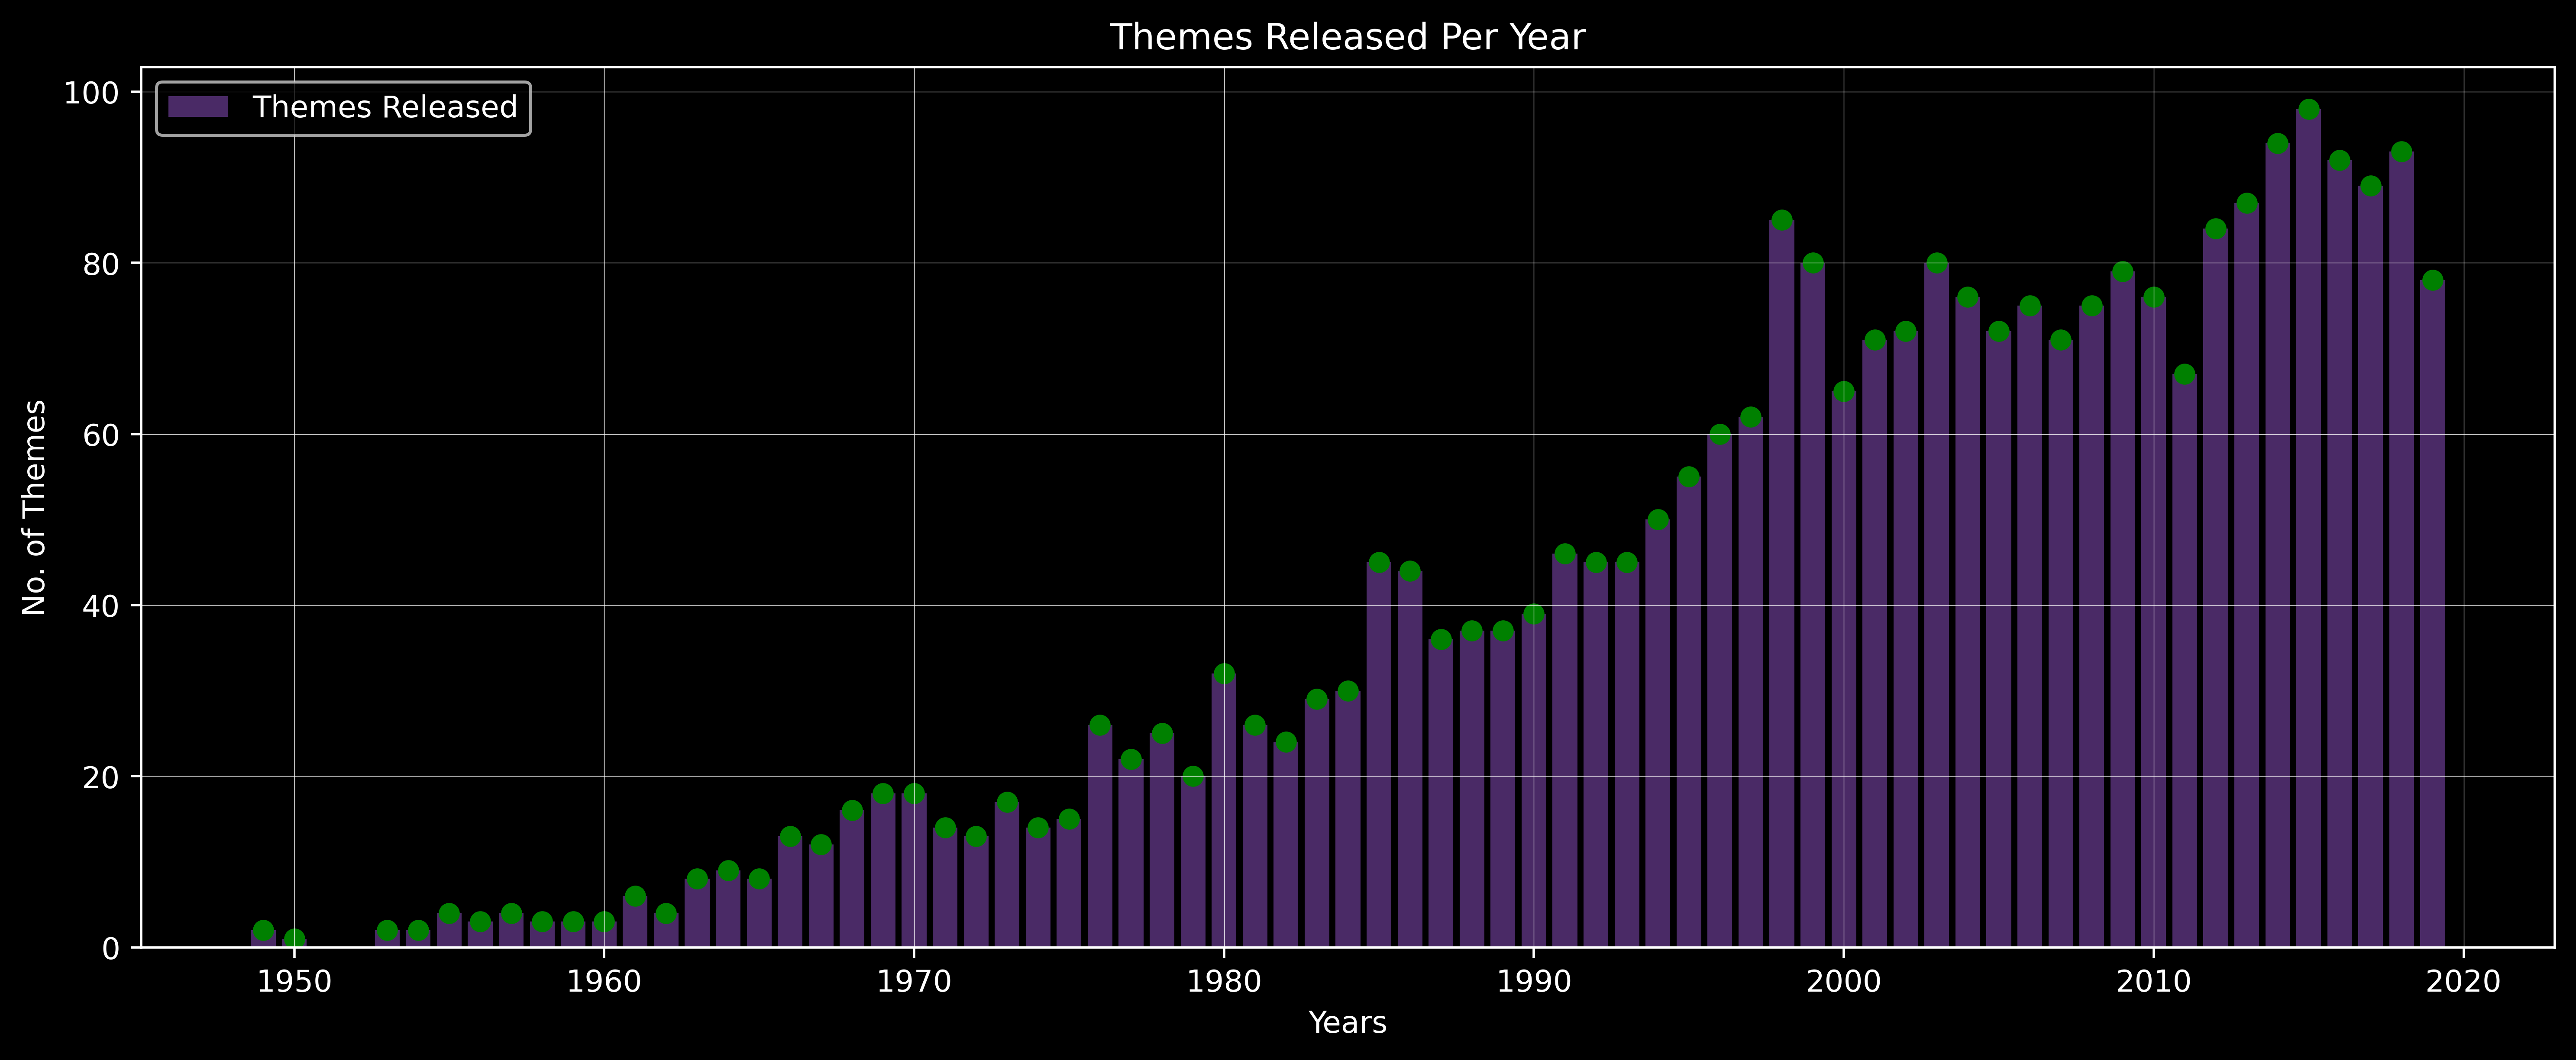

In [30]:
x_cor = unique_themes_df.index[:-2]
y_cor = unique_themes_df.theme_id[:-2]


plt.figure(figsize=(12, 5), dpi=500)
plt.title(label="Themes Released Per Year")
plt.xlabel(xlabel="Years")
plt.ylabel(ylabel="No. of Themes")

plt.bar(x_cor, y_cor, label="Themes Released", color="#4a2a66")
plt.scatter(x_cor, y_cor, color="g")
plt.grid(visible=True, linewidth=0.2)
plt.legend()
plt.tight_layout()
plt.show()

### Line Charts with Two Seperate Axes


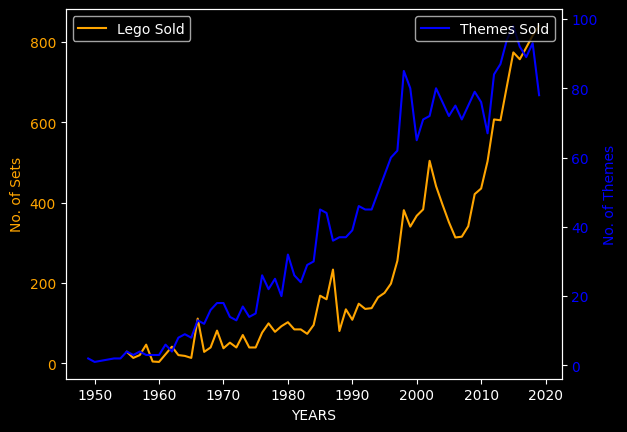

In [19]:
axis1 = plt.gca()  # -> Gets the current Axis
axis2 = axis1.twinx()  # -> Create anothe axis


x_cor1 = lego_released[4:-2].index
y_cor1 = lego_released[4:-2].set_num

x_cor2 = unique_themes_df.index[:-2]
y_cor2 = unique_themes_df.theme_id[:-2]


axis1.plot(x_cor1, y_cor1, color="orange", label="Lego Sold")  # -> Plotting First Graph
axis1.set_xlabel("YEARS")
axis1.set_ylabel("No. of Sets", color="orange")
axis1.tick_params(axis="y", labelcolor="orange")


axis2.plot(x_cor2, y_cor2, color="b", label="Themes Sold")  # -> Plotting 2nd Graph
axis2.set_xlabel("YEARS")
axis2.set_ylabel("No. of Themes", color="b")
axis2.tick_params(axis="y", labelcolor="b")

axis1.legend(loc="upper left")
axis2.legend(loc="upper right")


plt.show()

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?


In [20]:
avg_num_parts = sets_df.groupby("year").agg({"num_parts": pd.Series.mean})[3:-4]
avg_num_parts.columns = ["avg_part"]
avg_num_parts

,avg_part
year,
1954,12.357143
1955,36.607143
1956,18.923077
1957,44.750000
1958,41.130435
...,...
2013,180.031405
2014,179.911594
2015,191.379845


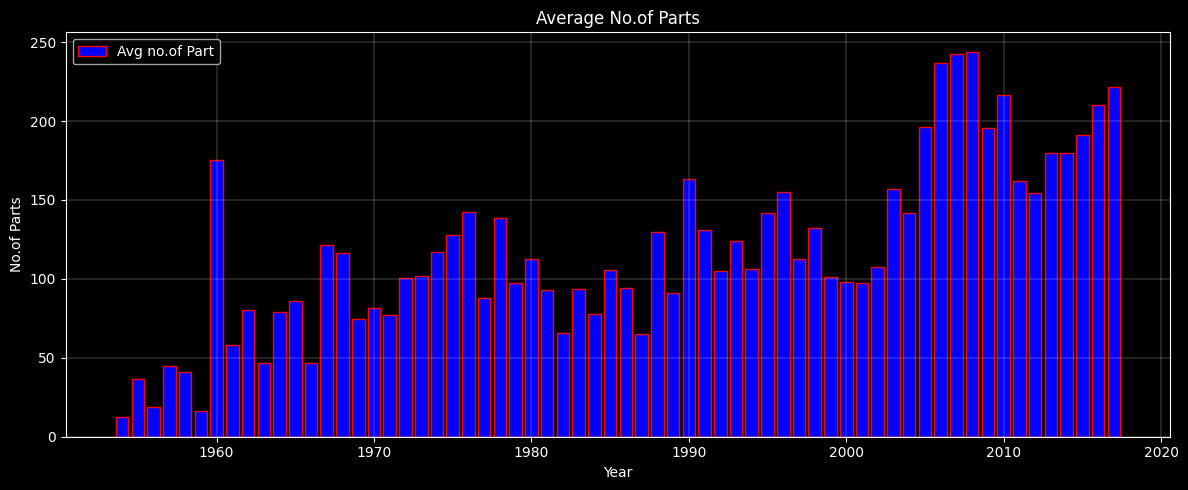

In [21]:
x_cor = avg_num_parts.index
y_cor = avg_num_parts.avg_part


plt.figure(figsize=(12, 5))

plt.title("Average No.of Parts")
plt.xlabel("Year")
plt.ylabel("No.of Parts")

plt.bar(x_cor, y_cor, color="b", edgecolor="r", label="Avg no.of Part")
plt.grid(visible=True, linewidth=0.2)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### Scatter Plots in Matplotlib


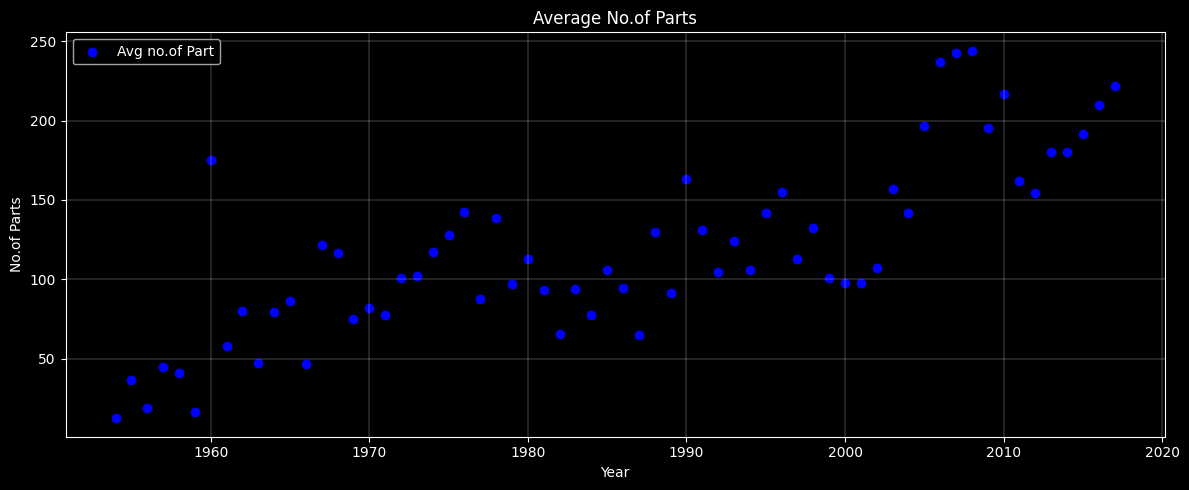

In [22]:
x_cor = avg_num_parts.index
y_cor = avg_num_parts.avg_part


plt.figure(figsize=(12, 5))

plt.title("Average No.of Parts")
plt.xlabel("Year")
plt.ylabel("No.of Parts")

plt.scatter(x_cor, y_cor, color="b", edgecolor="b", label="Avg no.of Part")
plt.grid(visible=True, linewidth=0.2)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### Number of Sets per LEGO Theme


LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?


In [23]:
set_theme_count = sets_df["theme_id"].value_counts()
set_theme_count.head()

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

<img src="https://i.imgur.com/Sg4lcjx.png"> </img>


### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.


In [24]:
themes = pd.read_csv("data/themes.csv")
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [25]:
themes[themes.name == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [26]:
sets_df[sets_df.theme_id == 18].head()

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339


In [27]:
sets_df[sets_df.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [28]:
set_theme_count.head()

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

In [29]:
merged_df = pd.merge(set_theme_count, themes, on="id")
merged_df[:3]

KeyError: 'id'

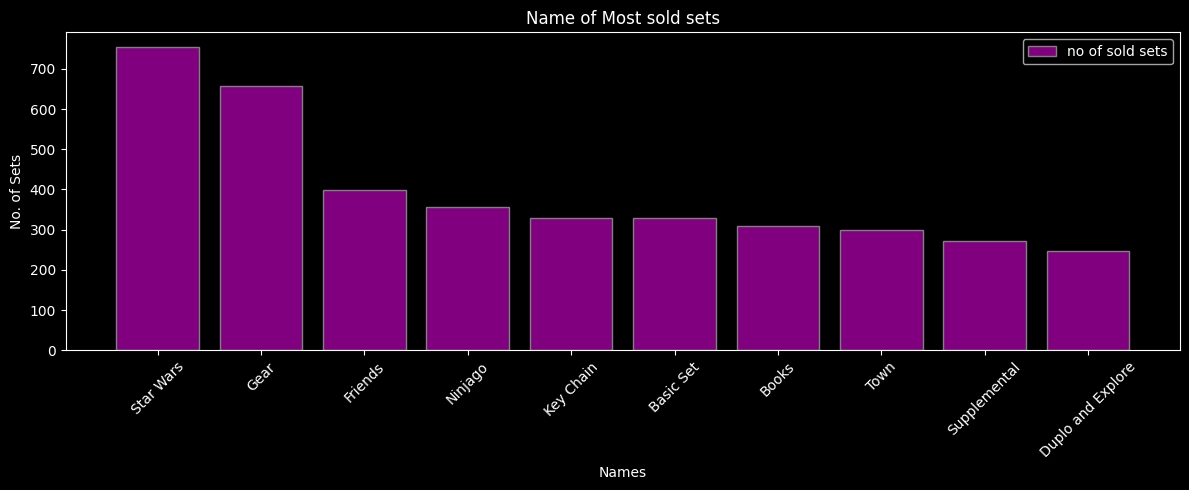

In [ ]:
x_cor = merged_df.name[:10]
y_cor = merged_df.set_count[:10]


plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)
plt.title(label="Name of Most sold sets")
plt.xlabel("Names")
plt.ylabel("No. of Sets")


plt.bar(x_cor, y_cor, label="no of sold sets", color="purple", edgecolor="gray")
plt.legend(loc="upper right")


plt.tight_layout()
plt.show()